# Wine Price Prediction Analysis Project
### Completed by Greg Bronn

<img src='80x80_winecom_logo.png'>

### *1. Problem Statement:* 
American consumers have developed an increased appreciation for wine, and retail options for purchasing it have grown rapidly. Despite its increased popularity, there is limited transparency into the pricing of wine. Consumers often have limited information when making a purchase, and often rely on experts or perception when evaluating the price of a specific wine. Although consumers have more information at their disposal in the online space, does this improve the visibility of factors that influence price?

* __Hypothesis 1:__ Advertised wine features can be used to sufficiently predict the price of Cabernet Sauvignon wines from Wine.com, where predictive accuracy, as measured by the ratio of RMSE to average wine price is 30% or less, i.e. error will be less than 30% of average price. 
* __Null Hypothesis 1:__ Advertised wine features from wine.com are not able to sufficiently predict the price of Cabernet Sauvignon wine for sale on wine.com, where RMSE is less than 30% of the average price of wine.


* __Hypothesis 2:__ Advertised wine features can be used to predict if a wine will be classified as a High Priced wine, with a retail price greater than $100, for Cabernet Sauvignon wines for sale on Wine.com, with precision greater than 50%
* __Null Hypothesis 2:__ Advertised wine features from wine.com are not able to sufficiently predict if Cabernet Sauvignon wine for sale on wine.com will be classified as High Priced.




### *2. Dataset Description:* 
The dataset for this analysis was obtained by pulling records from the Wine.com API interface. Data was collected in mid-September 2015, and 2700 records were collected. 

Acquired dataset original features of interest include:
* __Name:__ Label name of wine
* __Appellation:__ Specific geographic origin of the wine, i.e. Napa Valley
* __Region:__ Higher ordered grouping of geographic origin of the wine, i.e. California
* __Vintage:__ Year when wine was produced
* __Product Attributes:__ Descriptive features of the wine, i.e. Big & Bold
* __Vineyard:__ Name of producer
* __Ratings:__ Highest rated score from professional wine publications. Not user generated. Ranges from 88-100
* __ID:__ Unique catalog number of the wine
* __Price Retail:__ Retail price of the wine

### *3a. Data Pre-Processing Considerations:*
The following manipulations and criteria were applied to the data:
1. *Must include Product Attribute:* Records were excluded if they did not include this feature.
2. *Ratings Must be Populated:* Records were excluded if Ratings were null.

### *3b. Variable Creation Steps:*
Several variables were created as part of the analysis:
1. *Regions:* Dummy variables were created for the 7 geographic regions in the dataset.
2. *Attributes:* Dummy variables were created for the 14 product attribute values.
3. *Unique Label Words:* A variable to indicate the presence of text in the label, representing information not already present in other features, such as the Appellation, Region or Vineyard. Examples of these words would be 'Reserve' or 'Estate', which may connotate higher pricing. The 9 most frequent words were identified, and the text from each label was compared with this list in order to generate the indicator. 'Vineyard' was the 10th most frequent word, and it was dropped, with the assumption that it did not correspond with other brand positioning text. 


### *4. Data Exploration:*

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

cab_df2 = pd.read_csv('./cablist3.csv')
cab_df2 = cab_df2[cab_df2.RatingScore != 0]

#### Charting the distribution of price

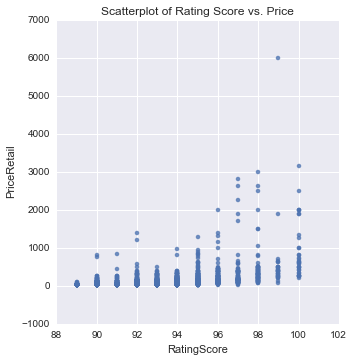

In [54]:
sns.lmplot('RatingScore', 'PriceRetail', data=cab_df2, fit_reg=False)
plt.title('Scatterplot of Rating Score vs. Price')

#### There are several records where price exceeds 1k, the distributions look better if these are omitted

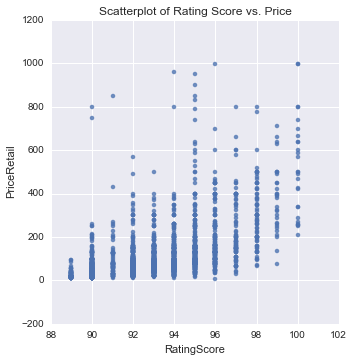

In [51]:
#Remove outliers with prices > $1k
cab_df2 = cab_df2[cab_df2.PriceRetail < 1000.00]

sns.lmplot('RatingScore', 'PriceRetail', data=cab_df2, fit_reg=False)
plt.title('Scatterplot of Rating Score vs. Price')

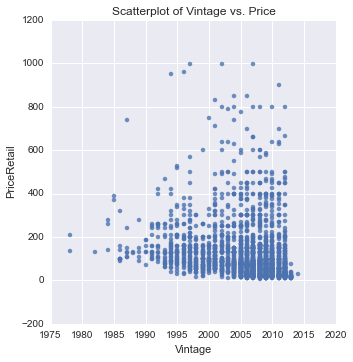

In [50]:
sns.lmplot('Vintage', 'PriceRetail', data=cab_df2, fit_reg=False)
plt.title('Scatterplot of Vintage vs. Price')

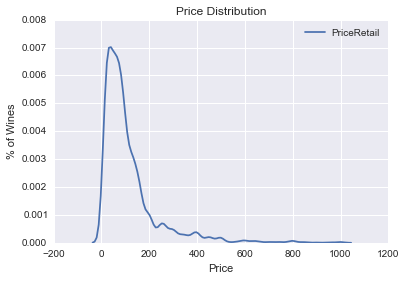

In [27]:
sns.kdeplot(cab_df2.PriceRetail)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('% of Wines')

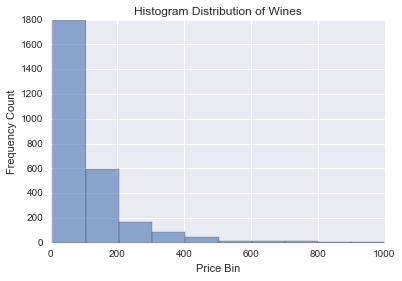

In [28]:
df2 = cab_df2['PriceRetail']
plt.figure();
df2.plot(kind='hist', alpha=0.6)
plt.title('Histogram Distribution of Wines')
plt.xlabel('Price Bin')
plt.ylabel('Frequency Count')

In [29]:
cab_df2.describe()

,Id,Vintage,RatingScore,PriceRetail,UnqWordInd,Attribute_94+ Rated Wine,Attribute_Big &amp; Bold,Attribute_Boutique Wines,Attribute_Business Gifts,Attribute_Collectible Wines,...,Attribute_Rich &amp; Creamy,Attribute_Screw Cap Wines,Attribute_Smooth &amp; Supple,Region_California,Region_Israel,Region_Italy,Region_South Africa,Region_South America,Region_Spain,Region_Washington
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,...,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000
mean,112412.600949,2005.779116,93.040891,114.292286,0.266886,0.000365,0.421687,0.047463,0.000730,0.338810,...,0.000365,0.028478,0.098941,0.749544,0.001460,0.005476,0.007667,0.074480,0.003651,0.073750
std,25939.233217,5.289617,2.461198,123.222508,0.442413,0.019108,0.493919,0.212665,0.027017,0.473392,...,0.019108,0.166363,0.298638,0.433355,0.038194,0.073814,0.087241,0.262598,0.060324,0.261411
min,316.000000,1978.000000,89.000000,7.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102982.000000,2004.000000,91.000000,41.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117430.000000,2007.000000,93.000000,76.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,129752.500000,2009.000000,95.000000,135.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,148089.000000,2014.000000,100.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploring Unique Word Indicator

In [48]:
word = pd.DataFrame(cab_df2.groupby(['UnqWordInd'])['PriceRetail'].mean())
word.columns = ['AvgPrice']

word2 = pd.DataFrame(cab_df2['UnqWordInd'].value_counts())
word2.columns=['Wine Count']

word_df = pd.concat([word, word2], axis=1)
word_df

,AvgPrice,Wine Count
UnqWordInd,,
0,105.560627,2008
1,138.277469,731


### Exploring Vintage

In [46]:
vint = pd.DataFrame(cab_df2.groupby(['Vintage'])['PriceRetail'].mean())
vint.columns = ['AvgPrice']

vint2 = pd.DataFrame(cab_df2['Vintage'].value_counts())
vint2.columns=['Wine Count']

vint_df = pd.concat([vint, vint2], axis=1)
vint_df

,AvgPrice,Wine Count
1978,172.000000,2
1982,129.000000,1
1984,225.666667,3
1985,379.495000,2
1986,133.664444,9
1987,228.571429,7
1988,127.000000,2
1989,151.198000,5
1990,143.165000,6
1991,160.076154,13


### Exploring Regions

In [47]:
region = pd.DataFrame(cab_df2.groupby(['Region'])['PriceRetail'].mean())
region.columns = ['AvgPrice']

region2 = pd.DataFrame(cab_df2['Region'].value_counts())
region2.columns=['Wine Count']

region_df = pd.concat([region, region2], axis=1)
region_df

,AvgPrice,Wine Count
Australia,49.083652,230
California,133.435066,2053
Israel,24.240000,4
Italy,38.646667,15
South Africa,32.444762,21
South America,27.956176,204
Spain,60.995000,10
Washington,99.723416,202


### Exploring Attributes

In [45]:
att = pd.DataFrame(cab_df2.groupby(['Attributes'])['PriceRetail'].mean())
att.columns = ['AvgPrice']

att2 = pd.DataFrame(cab_df2['Attributes'].value_counts())
att2.columns=['Wine Count']

att_df = pd.concat([att, att2], axis=1)
att_df

,AvgPrice,Wine Count
90+ Rated Wine,48.000000,1
94+ Rated Wine,99.990000,1
Big &amp; Bold,99.010364,1155
Boutique Wines,172.635538,130
Business Gifts,114.500000,2
Collectible Wines,161.733750,928
Earthy &amp; Spicy,35.868361,61
Great Bottles to Give,179.990000,2
Green Wines,48.919130,46
Kosher Wines,61.740000,4


### Exploring Rating Score 

In [49]:
rs = pd.DataFrame(cab_df2.groupby(['RatingScore'])['PriceRetail'].mean())
rs.columns = ['AvgPrice']

rs2 = pd.DataFrame(cab_df2['RatingScore'].value_counts())
rs2.columns=['Wine Count']

rs_df = pd.concat([rs, rs2], axis=1)
rs_df

,AvgPrice,Wine Count
89,25.216161,112
90,46.521226,522
91,95.545000,82
92,79.113585,477
93,95.847599,404
94,111.435379,383
95,157.682760,337
96,184.997551,196
97,227.095543,92
98,303.167532,77


### 4. Data Exploration Findings:
* **Data Distribution Does Not Appear Abnormal:** While there is a longer tail of higher priced wines, the overall shape of the distribution does not appear problematic, i.e. lumpy or thin.
* **Varying Predictive Power of Features:** Surprisingly, Vintage does not discriminate price as much as expected, Region_California and RatingScore seem to be strong.

### 5. Feature Selection:

Feature variables consist of the following 22 variables:

* Vintage: Continuous
* RatingScore: Continuous
* UnqWordInd: Categorical. Indicates presence of unqiue marketing words in label.
* Attribute_94+ Rated Wine: Categorical
* Attribute_Boutique Wines: Categorical
* Attribute_Business Gifts: Categorical
* Attribute_Collectible Wines: Categorical
* Attribute_Earthy & Spicy: Categorical
* Attribute_Great Bottles to Give: Categorical
* Attribute_Green Wines: Categorical
* Attribute_Kosher Wines: Categorical
* Attribute_Older Vintages: Categorical
* Attribute_Private Cellar List: Categorical
* Attribute_Rich & Creamy: Categorical
* Attribute_Smooth & Supple: Categorical
* Region_California: Categorical
* Region_Italy: Categorical
* Region_South Africa: Categorical
* Region_South America: Categorical
* Region_Spain: Categorical
* Region_Washington: Categorical

Althouh the feature set is relatively limited, it will be restricted in some models in order to improve performance and stability. Features that have been excluded:

* **Vineyard:** Most producers produce multiple wines across a spectrum of prices, and is not likely to have much predictive power.
* **Appellation:** This was excluded in favor of the Region variables in order to keep the feature set manageable.
* **Id:** An organizational feature of Wine.com, not believed to be related to price.
* **Name:** Not believed to be related to price. Any additional information from the Name, not reflected in other variables, would be captured in the UnqWordInd variable.

### 6a. Modeling Process: Hypothesis 1 - Regression Tree

* **Methodology:** A regression tree model was used to test hypothesis 1. It was selected given its flexibility and lack of assumptions regarding the underlying distribution of the data. The objective of the model is to predict the price of a bottle of wine, given its set of features. Success was evaluated based on the ability to minimize RMSE, and a lower value would be closer to the actual price of the wine. Leaf Samples were restricted to 20 across all models, and several iterations of the tree were run in an effort to boost performance. Below are the summarized results of the models:

|Model   |Variables   |Pricing   |Tree Depth   |RMSE   |RMSE/AvgPrice   |
|:-:|:-:|:-:|:-:|:-:|:-:|
|Tree 1   |All   |All   |5   |107.9   |0.96   |
|Tree 2   |Restricted   |All   |5   |105.8   |0.93   |
|Random Forest   |All   |All   |5   |105.5   |.92  |
|Tree 3   |All   |< 360   |5   |52.2  |.56   |
|Random Forest   |All   |< 360   |5   |50.9   |.55   |

* **Restricted Variables include:** RatingScore, UnqWordInd, Attribute_Boutique Wines, Attribute_Collectible Wines, Attribute_Smooth &amp; Supple, Attribute_Older Vintages, Region_California, Region_Washington. These were iteratively selected based on the result of the data exploration phase.

* **Pricing:** Given that price is the target variable, wines with very high prices may be distorting the ability of the model to create good predictions. In an effort to address this issue, the dataset was further restricted to include only those wines with price < $250.

* **Feature Importance:** Below are the feature importances for Tree 3:

|Feature   |Importance   |
|:-:|:-:|
|Attribute_Collectible Wines   |.001  |
|Rating Score   |.823   |
|Region_California   |.113   |
|Vintage   |.062   |

* **Conclusions:** While the models were able to predict the price of wine, RMSE remains higher than desired despite model optmization efforts. Given these results, a different model was explored, in an effort to improve predictive accuracy, and a linear regression model was built.  

### 6a. Modeling Process: Hypothesis 1 - Linear Regression

* **Methodology:** The next step in the analysis was to build a linear regression model to predict the continuous variable of price. Similar to the regression tree, the success of the model was evaluated on RMSE. Additionally, r2 and feature stability were also reviewed in order to assess the strength of the model. 


* **Feature Variables:** Feature variables were iteratively selected based on their ability to improve r2, and based on 95% confidence that the coefficient does not equal zero. Variables selected include:
 * _RatingScore_: Continuous
 * _RegionCalifornia_: Categorical
 * _Attribute_Collectible Wines_: Categorical
 * _Vintage_: Continuous
 

* **Linear Equation:** 

_Price_ = 3009.7745 + RatingScore(13.8805) + Region_California(33.2496) + Attribute_Collectible Wines(24.1031) + Vintage(-2.1134)

|Feature   |Coefficient   |Lower Confidence   |Upper Confidence   |
|:-:|:-:|:-:|:-:|
|RatingScore  |13.8805   |12.704   |15.058   |
|Region_California  |33.2496   |27.146   |39.353  |
|Attribute_Collectible Wines  |24.1031   |17.897   |30.310   |
|Vintage   |-2.1134  |-2.650   |-1.577   |



* **Coefficient Interpretation:**
 * _RatingScore:_ Price of wine increases by 13.88 for each unit increase in Rating Score
 * _RegionCalifornia:_ Price of wine increases by 33.25 if wine is from California vs. other origin
 * _Attribute_Collectible Wines:_ Price of wine increases by 24.10 if wine is categorized as a Collectible wine, compared with wines not categorized as Collectible
 * _Vintage:_ Price of wine increases with the age of the wine. Price will respond and decrease by a factor of 2.11 with each increase in the vintage year.
 
* **Model Effectiveness:** Overall, while the model is stable, it's predictive power isn't as strong as desired. The model features explain less than half of the variance in price, as indicated by the r2 of .44. Although RMSE is better than the regression tree models, it has only slightly improved. At this stage in the analysis, a different approach was taken to predict class association based on price.

|Metric   |Value   |
|:-:|:-:|
|r2   |.438  |
|Adj r2   |.436   |
|RMSE   |52.11  |
|RMSE/Avg Price   |.57  |

### 6b. Modeling Process: Hypothesis 2 - Classification Tree

* **Methodology:** The testing of the second hypothesis involved modifying the dataset and adding a new target variable which indicated if the price of the wine was greater than $100. The price point is arbitrary, and based on subjective judgement that wines costing more than this are expensive. Because this is a supervised categorical proglem, the models used to test hypothesis 2 were a Classification Tree and a Logistic Regression. The Classification Tree was selected because of its flexibility, while the Logistic model was selected to predict the probability of being expensive.


* **Model Evaluation Criteria:** The success of the models will be evaluated based on the following criteria:

   1. **Precision:** The ability of the model to accurately identify which wines are high priced from the population of high priced wines is an important outcome. Similarly, the ability of the model to accurately identify wines that are not high priced from the population of wines that are not expensive is also an important outcome.
   
   2. **Recall:** Correspondingly, it is also important that the sensitivity of the model's predictions is evaluated in order to understand if the model is predicting instances of being expensive or not correctly. 
   
   3. **Predictive Stability:** Models will also be cross-validated in order to determine the stability of precision and recall. 


* **Classification Tree:** The objective of this model is classify a wine as being expensive or not based on the wine's features. Trees were run with a maximum depth of 3 and leaf samples were set to 20. Below is the summary of the classification tree models:

|Model   |Variables   |Precision   |High Price Recall   |Cross-Validation Precision   |Cross-Validation Recall   |
|:-:|:-:|:-:|:-:|:-:|:-:|
|Tree 1   |All   |.79   |.71   |.59   |.47   |
|Tree 2   |Restricted   |.79   |.71   |.59 |.47 |
|Random Forest   |All   |.80   |.61   |.61 |.47 |
|Random Forest - Gradient Boost   |All   |.81   |.66   |.60 |.44 |


* **Restricted Variables include:** RatingScore, UnqWordInd, Attribute_Collectible Wines, Region_California, Vintage, Attribute_Big &amp; Bold. Variables were selected in an effort to boost model stability.


* **Feature Importance:** Below is a summary of the only features with importance as ranked by the model: 

|Feature   |Importance   |
|:-:|:-:|
|Vintage   |.105   |
|Rating Score   |.687   |
|Region_California   |.207   |


* **Model Effectiveness:** Although the model produced good precision and recall results, it did not generalize well and proved to be unstable during the cross-validation analysis. Based on these results, modeling strategy was changed, and a logistic regression model was developed.

   

### 6b. Modeling Process: Hypothesis 2 - Logistic Regression

* **Logistic Regression:** The objective of this model was to predict the probability of a wine being high priced or not based on the wine's features. Below is a summary of the feature variables used to build the model:

|Feature   |Coefficient   |Lower Confidence   |Upper Confidence   |Odds Ratio
|:-:|:-:|:-:|:-:|:-:|
|RatingScore  |.5772   |.510   |.644   |1.78   |
|UnqWordInd  |.8335   |.546   |1.121   |2.30   |
|Attribute_Collectible Wines   |.5284   |.261   |.796   |1.69  |
|Region_California   |1.9161   |1.500  |2.332   |6.79   |
|Vintage   |-.0815   |-.107  |-.056   |9.21   |



* **Logistic Equation:**

_Probability of Wine Being High Priced_ = (exp(106.8729 + .5772(RatingScore) + .8335(UnqWordInd) +  .5284(Attribute_Collectible Wines) + 1.9161(Region_California) -.0815(Vintage)))/(1+(exp(106.8729 + .5772(RatingScore) + .8335(UnqWordInd) + .5284(Attribute_Collectible Wines) + 1.9161(Region_California) - .0815(Vintage)))

* **Coefficient Interpretation:** 

 * _RatingScore:_ The odds of a wine being high priced are 1.8x higher with each increase in the rating score compared to wines with lower ratings.
 * _UnqWordInd:_ The odds of a wine being high priced are 2.3x higher for wines with unique marketing words, than for those without.
 * _Attribute_Collectible Wines:_ The odds for a wine being high priced are 1.7x higher for wines categorized as collectible wines, than for those not categorized as such.
 * _Region_California:_ The odds of a wine being high priced are 6.8x higher for wines originating in California, compared with other regions. 
 * _Vintage:_ The odds of a wine being high priced are 9.2x higher with each decrease in vintage.
 
 

* **Model Effectiveness:** The logistic model has better precision and recall when cross-validated than the classification tree, and would likely generalize better. While it would be good if the recall were higher, the addition of further variables degraded model stability or did not prove to be significant. Below is a summary of scoring and cross-validation performance:

|Metric   |Value   
|:-:|:-:|
|Precision  |.79   |
|High Priced Recall  |.66  |
|Cross-Validation Precision  |.76   |
|Cross-Validation Recall  |.63   |
|AUC  |.87   |



### Conclusions: 

* **Reject the 1st Hypothesis:** The models were not able to predict the price of wine with enough accuracy to be effective.
* **Accept the 2nd Hypothesis:** The logistic regression model was able to predict the probability of a wine being classified as a high priced wine with with a true positive rate greater than 50%
* **Other Factors At Work:** Other factors not reflected in the dataset, and not transparent to consumers, would seem to be influencing the price of wines analyzed in this analysis. Wine appreciation is notably subjective, and pricing may be set independent of the features that the consumer believes drives pricing.
* **Future Considerations:** This analysis only examined Cabernet Sauvignon wines, and it is possible that pricing dynamics are varied across different wine types, and may be worth looking into.